In [ ]:
import tensorflow as tf

print(tf.__version__)
a=tf.random.uniform([2,3],0,1)
print(a)
print(type(a))

2.8.0
tf.Tensor(
[[0.5110748  0.55368376 0.59281886]
 [0.8628411  0.16618407 0.83751345]], shape=(2, 3), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
import tensorflow as tf
import numpy as np

t=tf.random.uniform([2,3],0,1)
n=np.random.uniform(0,1,[2,3])

print("tensorflow로 생성한 텐서:\n",t,"\n")
print("numpy로 생성한 ndarray:\n",n,"\n")

res=t+n
print("덧셈 결과:\n",res)


tensorflow로 생성한 텐서:
 tf.Tensor(
[[0.45902264 0.11084282 0.9625784 ]
 [0.35997295 0.21287107 0.81958854]], shape=(2, 3), dtype=float32) 

numpy로 생성한 ndarray:
 [[0.46231605 0.61327375 0.89585915]
 [0.16209819 0.57275304 0.04485116]] 

덧셈 결과:
 tf.Tensor(
[[0.9213387  0.72411656 1.8584375 ]
 [0.5220711  0.7856241  0.8644397 ]], shape=(2, 3), dtype=float32)


In [ ]:
import tensorflow as tf
import tensorflow.keras.datasets as ds

(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
yy_train=tf.one_hot(y_train,10,dtype=tf.int8)
print("MNIST:",x_train.shape,y_train.shape,yy_train.shape)

(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data()
yy_train=tf.one_hot(y_train,10,dtype=tf.int8)
print("CIFAR-10:",x_train.shape,y_train.shape,yy_train.shape)

(x_train,y_train),(x_test,y_test)=ds.boston_housing.load_data()
print("Boston Housing: ",x_train.shape,y_train.shape)

(x_train,y_train),(x_test,y_test)=ds.reuters.load_data()
print("Reuter:",x_train.shape,y_train.shape)


11501568/11490434 [==============================] - 0s 0us/step
MNIST: (60000, 28, 28) (60000,) (60000, 10)
170508288/170498071 [==============================] - 11s 0us/step
CIFAR-10: (50000, 32, 32, 3) (50000, 1) (50000, 1, 10)
65536/57026 [==================================] - 0s 0us/step
Boston Housing:  (404, 13) (404,)
2121728/2110848 [==============================] - 0s 0us/step
Reuter: (8982,) (8982,)


In [ ]:
import tensorflow as tf

x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

w = tf.Variable([[1.0],[1.0]])
b= tf.Variable(-0.5)

s= tf.add(tf.matmul(x,w),b)
o=tf.sign(s)

print(o)


tf.Tensor(
[[-1.]
 [ 1.]
 [ 1.]
 [ 1.]], shape=(4, 1), dtype=float32)


In [ ]:
import tensorflow as tf

x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

w = tf.Variable(tf.random.uniform([2,1],-0.5,0.5))
b= tf.Variable(tf.zeros([1]))

opt = tf.keras.optimizers.SGD(learning_rate=0.1)

def forward() :
  s = tf.add(tf.matmul(x,w),b)
  o = tf.tanh(s)
  return o

def loss() :
  o = forward()
  return tf.reduce_mean((y-o)**2)

for i in range(500):
  opt.minimize(loss,var_list=[w,b])
  if(i%100==0):
    print("loss at epoch",i,"=",loss().numpy())
o = forward()
print(o)

loss at epoch 0 = 0.90254587
loss at epoch 100 = 0.0915188
loss at epoch 200 = 0.042249445
loss at epoch 300 = 0.026569981
loss at epoch 400 = 0.019139422
tf.Tensor(
[[-0.8162657 ]
 [ 0.88643456]
 [ 0.8862344 ]
 [ 0.9992657 ]], shape=(4, 1), dtype=float32)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

n_input =2
n_output =1

perceptron= Sequential()
perceptron.add(Dense(units=n_output,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))

perceptron.compile(loss='mse',optimizer=SGD(learning_rate=0.1),metrics=['mse'])
perceptron.fit(x,y,epochs=500,verbose=2)

res=perceptron.predict(x)
print(res)

Epoch 1/500
1/1 - 0s - loss: 0.9458 - mse: 0.9458 - 469ms/epoch - 469ms/step
Epoch 2/500
1/1 - 0s - loss: 0.7208 - mse: 0.7208 - 8ms/epoch - 8ms/step
Epoch 3/500
1/1 - 0s - loss: 0.6228 - mse: 0.6228 - 8ms/epoch - 8ms/step
Epoch 4/500
1/1 - 0s - loss: 0.5735 - mse: 0.5735 - 8ms/epoch - 8ms/step
Epoch 5/500
1/1 - 0s - loss: 0.5430 - mse: 0.5430 - 8ms/epoch - 8ms/step
Epoch 6/500
1/1 - 0s - loss: 0.5207 - mse: 0.5207 - 9ms/epoch - 9ms/step
Epoch 7/500
1/1 - 0s - loss: 0.5025 - mse: 0.5025 - 11ms/epoch - 11ms/step
Epoch 8/500
1/1 - 0s - loss: 0.4867 - mse: 0.4867 - 9ms/epoch - 9ms/step
Epoch 9/500
1/1 - 0s - loss: 0.4723 - mse: 0.4723 - 8ms/epoch - 8ms/step
Epoch 10/500
1/1 - 0s - loss: 0.4588 - mse: 0.4588 - 16ms/epoch - 16ms/step
Epoch 11/500
1/1 - 0s - loss: 0.4460 - mse: 0.4460 - 8ms/epoch - 8ms/step
Epoch 12/500
1/1 - 0s - loss: 0.4338 - mse: 0.4338 - 9ms/epoch - 9ms/step
Epoch 13/500
1/1 - 0s - loss: 0.4221 - mse: 0.4221 - 10ms/epoch - 10ms/step
Epoch 14/500
1/1 - 0s - loss: 0.4108 

In [ ]:
from tensorflow.python.ops.candidate_sampling_ops import learned_unigram_candidate_sampler
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

n_input=784
n_hidden=1024
n_output =10

mlp=Sequential()
mlp.add(Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.compile(loss='mean_squared_error',optimizer = Adam(learning_rate=0.001),metrics=['accuracy'])
hist = mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res = mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.grid()
plt.show()

Epoch 1/30
469/469 - 6s - loss: 0.0426 - accuracy: 0.8458 - val_loss: 0.0274 - val_accuracy: 0.9139 - 6s/epoch - 13ms/step
Epoch 2/30
469/469 - 6s - loss: 0.0226 - accuracy: 0.9266 - val_loss: 0.0196 - val_accuracy: 0.9407 - 6s/epoch - 13ms/step
Epoch 3/30
469/469 - 7s - loss: 0.0164 - accuracy: 0.9469 - val_loss: 0.0145 - val_accuracy: 0.9536 - 7s/epoch - 14ms/step
Epoch 4/30
469/469 - 6s - loss: 0.0137 - accuracy: 0.9566 - val_loss: 0.0133 - val_accuracy: 0.9576 - 6s/epoch - 12ms/step
Epoch 5/30
469/469 - 6s - loss: 0.0120 - accuracy: 0.9631 - val_loss: 0.0126 - val_accuracy: 0.9605 - 6s/epoch - 12ms/step
Epoch 6/30
469/469 - 6s - loss: 0.0110 - accuracy: 0.9667 - val_loss: 0.0108 - val_accuracy: 0.9646 - 6s/epoch - 12ms/step
Epoch 7/30
469/469 - 6s - loss: 0.0101 - accuracy: 0.9698 - val_loss: 0.0106 - val_accuracy: 0.9666 - 6s/epoch - 12ms/step
Epoch 8/30
469/469 - 6s - loss: 0.0094 - accuracy: 0.9728 - val_loss: 0.0107 - val_accuracy: 0.9689 - 6s/epoch - 12ms/step
Epoch 9/30
469/4

Epoch 1/30
469/469 - 6s - loss: 0.0792 - accuracy: 0.6336 - val_loss: 0.0341 - val_accuracy: 0.8222 - 6s/epoch - 14ms/step
Epoch 2/30
469/469 - 6s - loss: 0.0303 - accuracy: 0.8432 - val_loss: 0.0303 - val_accuracy: 0.8421 - 6s/epoch - 12ms/step
Epoch 3/30
469/469 - 6s - loss: 0.0270 - accuracy: 0.8576 - val_loss: 0.0287 - val_accuracy: 0.8445 - 6s/epoch - 12ms/step
Epoch 4/30
469/469 - 6s - loss: 0.0251 - accuracy: 0.8673 - val_loss: 0.0257 - val_accuracy: 0.8566 - 6s/epoch - 13ms/step
Epoch 5/30
469/469 - 6s - loss: 0.0238 - accuracy: 0.8742 - val_loss: 0.0254 - val_accuracy: 0.8610 - 6s/epoch - 12ms/step
Epoch 6/30
469/469 - 6s - loss: 0.0226 - accuracy: 0.8799 - val_loss: 0.0257 - val_accuracy: 0.8644 - 6s/epoch - 12ms/step
Epoch 7/30
469/469 - 6s - loss: 0.0216 - accuracy: 0.8859 - val_loss: 0.0234 - val_accuracy: 0.8738 - 6s/epoch - 12ms/step
Epoch 8/30
469/469 - 6s - loss: 0.0209 - accuracy: 0.8895 - val_loss: 0.0249 - val_accuracy: 0.8715 - 6s/epoch - 12ms/step
Epoch 9/30
469/4

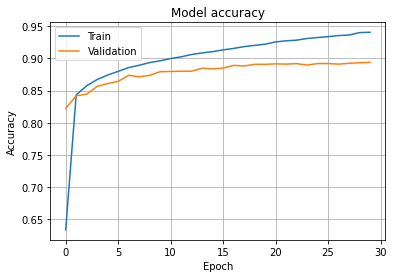

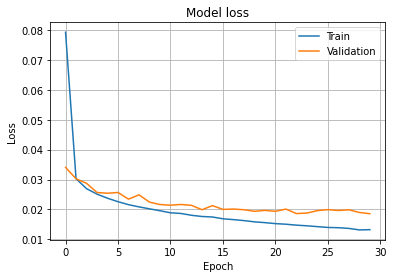

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

n_input=784
n_hidden=1024
n_output =10

mlp=Sequential()
mlp.add(Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.compile(loss='mean_squared_error',optimizer = Adam(learning_rate=0.001),metrics=['accuracy'])
hist = mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res = mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.grid()
plt.show()



11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/30
469/469 - 17s - loss: 0.0257 - accuracy: 0.8967 - val_loss: 0.0128 - val_accuracy: 0.9441 - 17s/epoch - 36ms/step
Epoch 2/30
469/469 - 15s - loss: 0.0105 - accuracy: 0.9521 - val_loss: 0.0085 - val_accuracy: 0.9583 - 15s/epoch - 33ms/step
Epoch 3/30
469/469 - 16s - loss: 0.0070 - accuracy: 0.9663 - val_loss: 0.0063 - val_accuracy: 0.9668 - 16s/epoch - 35ms/step
Epoch 4/30
469/469 - 16s - loss: 0.0053 - accuracy: 0.9742 - val_loss: 0.0052 - val_accuracy: 0.9737 - 16s/epoch - 33ms/step
Epoch 5/30
469/469 - 16s - loss: 0.0044 - accuracy: 0.9788 - val_loss: 0.0054 - val_accuracy: 0.9725 - 16s/epoch - 34ms/step
Epoch 6/30
469/469 - 17s - loss: 0.0037 - accuracy: 0.9828 - val_loss: 0.0047 - val_accuracy: 0.9759 - 17s/epoch - 37ms/step
Epoch 7/30
469/469 - 16s - loss: 0.0032 - accuracy: 0.9853 - val_loss: 0.0050 - val_accuracy: 0.9731 - 16s/epoch - 35ms/step
Epoch 8/30
469/469 - 17s - loss: 0.0030 - accuracy: 0.9864 -

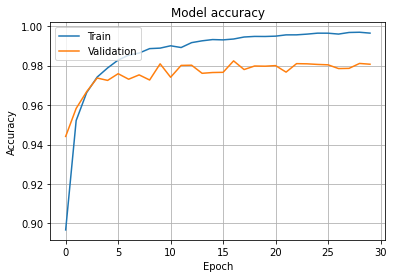

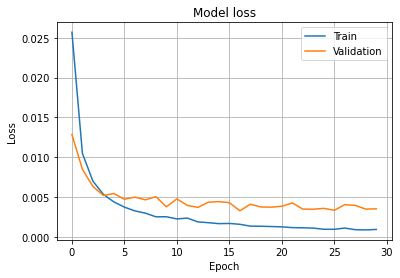

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

n_input = 784
n_hidden1=1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output=10

mlp=Sequential()
mlp.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden2,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden3,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden4,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error',optimizer = Adam(learning_rate=0.001),metrics=['accuracy'])
hist = mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res = mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.grid()
plt.show()



Epoch 1/30
469/469 - 19s - loss: 0.0164 - accuracy: 0.8920 - val_loss: 0.0108 - val_accuracy: 0.9290 - 19s/epoch - 40ms/step
Epoch 2/30
469/469 - 17s - loss: 0.0096 - accuracy: 0.9370 - val_loss: 0.0084 - val_accuracy: 0.9454 - 17s/epoch - 37ms/step
Epoch 3/30
469/469 - 17s - loss: 0.0073 - accuracy: 0.9528 - val_loss: 0.0071 - val_accuracy: 0.9535 - 17s/epoch - 36ms/step
Epoch 4/30
469/469 - 17s - loss: 0.0059 - accuracy: 0.9622 - val_loss: 0.0059 - val_accuracy: 0.9617 - 17s/epoch - 37ms/step
Epoch 5/30
469/469 - 18s - loss: 0.0050 - accuracy: 0.9689 - val_loss: 0.0054 - val_accuracy: 0.9640 - 18s/epoch - 38ms/step
Epoch 6/30
469/469 - 17s - loss: 0.0042 - accuracy: 0.9745 - val_loss: 0.0049 - val_accuracy: 0.9677 - 17s/epoch - 37ms/step
Epoch 7/30
469/469 - 18s - loss: 0.0037 - accuracy: 0.9775 - val_loss: 0.0045 - val_accuracy: 0.9705 - 18s/epoch - 39ms/step
Epoch 8/30
469/469 - 21s - loss: 0.0031 - accuracy: 0.9812 - val_loss: 0.0042 - val_accuracy: 0.9717 - 21s/epoch - 45ms/step


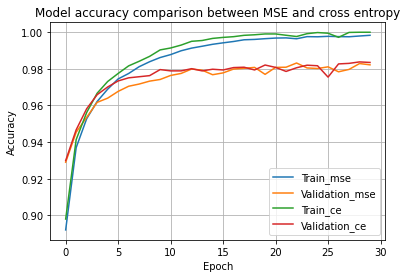

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

n_input = 784
n_hidden1=1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output=10

dmlp_mse=Sequential()
dmlp_mse.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,)))
dmlp_mse.add(Dense(units=n_hidden2,activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden3,activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden4,activation='tanh'))
dmlp_mse.add(Dense(units=n_output,activation='softmax'))
dmlp_mse.compile(loss='mean_squared_error',optimizer = Adam(learning_rate=0.0001),metrics=['accuracy'])
hist_mse = dmlp_mse.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

dmlp_ce=Sequential()
dmlp_ce.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,)))
dmlp_ce.add(Dense(units=n_hidden2,activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden3,activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden4,activation='tanh'))
dmlp_ce.add(Dense(units=n_output,activation='softmax'))

dmlp_ce.compile(loss='categorical_crossentropy',optimizer = Adam(learning_rate=0.0001),metrics=['accuracy'])
hist_ce = dmlp_ce.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res_mse = dmlp_mse.evaluate(x_test,y_test,verbose=0)
print("평균제곱오차의 정확률은",res_mse[1]*100)
res_ce = dmlp_ce.evaluate(x_test,y_test,verbose=0)
print("교차 엔트로피의 정확률은",res_ce[1]*100)

plt.plot(hist_mse.history['accuracy'])
plt.plot(hist_mse.history['val_accuracy'])
plt.plot(hist_ce.history['accuracy'])
plt.plot(hist_ce.history['val_accuracy'])
plt.title('Model accuracy comparison between MSE and cross entropy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_mse','Validation_mse','Train_ce','Validation_ce'],loc='best')
plt.grid()
plt.show()

Epoch 1/50
235/235 - 14s - loss: 0.9702 - accuracy: 0.7092 - val_loss: 0.6838 - val_accuracy: 0.7585 - 14s/epoch - 59ms/step
Epoch 2/50
235/235 - 14s - loss: 0.5938 - accuracy: 0.8011 - val_loss: 0.5673 - val_accuracy: 0.8050 - 14s/epoch - 58ms/step
Epoch 3/50
235/235 - 14s - loss: 0.5190 - accuracy: 0.8214 - val_loss: 0.5265 - val_accuracy: 0.8150 - 14s/epoch - 58ms/step
Epoch 4/50
235/235 - 13s - loss: 0.4807 - accuracy: 0.8322 - val_loss: 0.5070 - val_accuracy: 0.8181 - 13s/epoch - 57ms/step
Epoch 5/50
235/235 - 13s - loss: 0.4566 - accuracy: 0.8391 - val_loss: 0.4781 - val_accuracy: 0.8286 - 13s/epoch - 57ms/step
Epoch 6/50
235/235 - 13s - loss: 0.4387 - accuracy: 0.8454 - val_loss: 0.4645 - val_accuracy: 0.8349 - 13s/epoch - 57ms/step
Epoch 7/50
235/235 - 13s - loss: 0.4249 - accuracy: 0.8506 - val_loss: 0.4550 - val_accuracy: 0.8397 - 13s/epoch - 57ms/step
Epoch 8/50
235/235 - 13s - loss: 0.4142 - accuracy: 0.8535 - val_loss: 0.5047 - val_accuracy: 0.8189 - 13s/epoch - 56ms/step


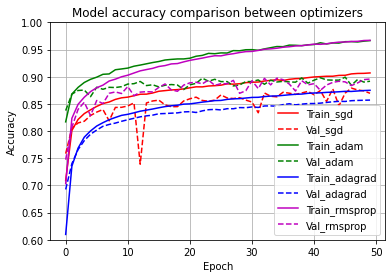

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam ,Adagrad, RMSprop

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

n_input = 784
n_hidden1=1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output=10

batch_size = 256
n_epoch = 50

def build_model() :
  model = Sequential()
  model.add(Dense(units=n_hidden1,activation='relu',input_shape=(n_input,)))
  model.add(Dense(units=n_hidden2,activation='tanh'))
  model.add(Dense(units=n_hidden3,activation='tanh'))
  model.add(Dense(units=n_hidden4,activation='tanh'))
  model.add(Dense(units=n_output,activation='softmax'))
  return model

dmlp_sgd = build_model()
dmlp_sgd.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])
hist_sgd = dmlp_sgd.fit(x_train,y_train,batch_size=batch_size,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

dmlp_adam = build_model()
dmlp_adam.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist_adam = dmlp_adam.fit(x_train,y_train,batch_size=batch_size,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

dmlp_adagrad = build_model()
dmlp_adagrad.compile(loss='categorical_crossentropy',optimizer=Adagrad(),metrics=['accuracy'])
hist_adagrad = dmlp_adagrad.fit(x_train,y_train,batch_size=batch_size,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

dmlp_rmsprop = build_model()
dmlp_rmsprop.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
hist_rmsprop = dmlp_rmsprop.fit(x_train,y_train,batch_size=batch_size,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

print("SGD 정확률은",dmlp_sgd.evaluate(x_test,y_test,verbose=0)[1]*100)
print("Adam 정확률은",dmlp_adam.evaluate(x_test,y_test,verbose=0)[1]*100)
print("Adagard 정확률은",dmlp_adagrad.evaluate(x_test,y_test,verbose=0)[1]*100)
print("RSMprop 정확률은",dmlp_rmsprop.evaluate(x_test,y_test,verbose=0)[1]*100)

import matplotlib.pyplot as plt

plt.plot(hist_sgd.history['accuracy'],'r')
plt.plot(hist_sgd.history['val_accuracy'],'r--')

plt.plot(hist_adam.history['accuracy'],'g')
plt.plot(hist_adam.history['val_accuracy'],'g--')

plt.plot(hist_adagrad.history['accuracy'],'b')
plt.plot(hist_adagrad.history['val_accuracy'],'b--')

plt.plot(hist_rmsprop.history['accuracy'],'m')
plt.plot(hist_rmsprop.history['val_accuracy'],'m--')

plt.title('Model accuracy comparison between optimizers')
plt.ylim((0.6,1.0))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_sgd','Val_sgd','Train_adam','Val_adam','Train_adagrad','Val_adagrad','Train_rmsprop','Val_rmsprop'],
           loc='best')
plt.grid()
plt.show()

SGD: 0.850083327293396
Adam: 0.8960666537284852
Adagrad: 0.8311499953269958
RMSprop: 0.8887666702270508


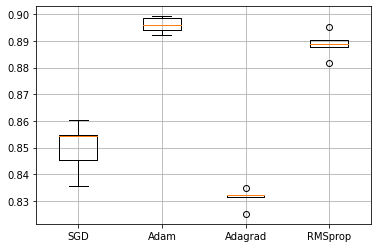

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam ,Adagrad, RMSprop
from sklearn.model_selection import KFold

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

n_input = 784
n_hidden1=1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output=10

batch_size = 256
n_epoch = 20
k=5

def build_model() :
  model = Sequential()
  model.add(Dense(units=n_hidden1,activation='relu',input_shape=(n_input,)))
  model.add(Dense(units=n_hidden2,activation='relu'))
  model.add(Dense(units=n_hidden3,activation='relu'))
  model.add(Dense(units=n_hidden4,activation='relu'))
  model.add(Dense(units=n_output,activation='softmax'))
  return model

def cross_validation(opt):
  accuracy=[]
  for train_index,val_index in KFold(k).split(x_train):
    xtrain,xval = x_train[train_index],x_train[val_index]
    ytrain,yval = y_train[train_index],y_train[val_index]
    dmlp = build_model()
    dmlp.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    dmlp.fit(xtrain,ytrain,batch_size=batch_size,epochs=n_epoch,verbose=0)
    accuracy.append(dmlp.evaluate(xval,yval,verbose=0)[1])
  return accuracy

acc_sgd=cross_validation(SGD())
acc_adam=cross_validation(Adam())
acc_adagrad=cross_validation(Adagrad())
acc_rmsprop=cross_validation(RMSprop())

print("SGD:",np.array(acc_sgd).mean())
print("Adam:",np.array(acc_adam).mean())
print("Adagrad:",np.array(acc_adagrad).mean())
print("RMSprop:",np.array(acc_rmsprop).mean())

import matplotlib.pyplot as plt

plt.boxplot([acc_sgd,acc_adam,acc_adagrad,acc_rmsprop],labels=["SGD","Adam","Adagrad","RMSprop"])
plt.grid()